# General settings

In [166]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dimdate import create_dimdate, add_holidays
from parse_data import load_and_parse_data

In [168]:
pd.set_option('display.max_columns', None)

In [169]:
EXCEL_FILE     = 'data/on-duty-2024.xlsx'
HOLIDAYS_FILE  = 'data/holidays.csv'
WORK_CODES_FILE = 'data/codes.csv'

GENERATE_DIMDATE = False
START_DATE = '2024-01-01'
END_DATE   = '2024-12-31'

SKIP_ROWS = 12 # Number of rows at the top of each month data

## Functions

In [170]:
def normalize_rows(df:pd.DataFrame) -> pd.DataFrame:
    return df.div(df.sum(axis=1), axis=0) * 100

In [171]:
def reorder_statuses(df):
    reordered_columns = ['Working', 'Training', 'Part time', 'Sick', 'Off']
    return df[reordered_columns]

In [172]:
def display_daily_status(df, N=20):
    ax = df.plot(kind='bar', stacked=True, width=1,)
    xticks_positions = range(0, len(df), N)
    xticks_labels = [df.index[i].strftime('%Y-%m-%d') for i in xticks_positions]
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(xticks_labels, rotation=45, ha='right')
    plt.xlabel('')

# Dimdate generation

In [173]:
holidays = pd.read_csv(HOLIDAYS_FILE)

dimdate = create_dimdate(START_DATE, END_DATE)
dimdate = add_holidays(dimdate, list(holidays['holidays']))
dimdate

,Date,DateKey,DayOfWeek,DayOfWeekText,DayOfWeekShort,MonthNumber,IsWeekend,IsHoliday,DaysToHoliday
0,2024-01-01,20240101,1,Monday,Mon,1,0,1,0
1,2024-01-02,20240102,2,Tuesday,Tue,1,0,0,1
2,2024-01-03,20240103,3,Wednesday,Wed,1,0,0,2
3,2024-01-04,20240104,4,Thursday,Thu,1,0,0,3
4,2024-01-05,20240105,5,Friday,Fri,1,0,0,4
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,20241227,5,Friday,Fri,12,0,1,0
362,2024-12-28,20241228,6,Saturday,Sat,12,1,1,0
363,2024-12-29,20241229,7,Sunday,Sun,12,1,1,0
364,2024-12-30,20241230,1,Monday,Mon,12,0,1,0


# Import excel data

In [174]:
df = load_and_parse_data(EXCEL_FILE, year=2024, skip_sheets=1, skiprows=SKIP_ROWS)
df

c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not support

,S/Dept,Atelier,ID,Name,AMPM,DateKey,Code
0,Principal,Atelier A,0339,Nom 031,AM,20240101,NaN
1,Principal,Atelier A,0339,Nom 031,PM,20240101,NaN
2,Principal,Atelier A,7933,Nom 052,AM,20240101,NaN
3,Principal,Atelier A,7933,Nom 052,PM,20240101,NaN
4,Principal,Atelier A,3724,Nom 073,AM,20240101,NaN
...,...,...,...,...,...,...,...
76001,Principal,Atelier K,3235,Nom 093,PM,20241231,NaN
76002,Principal,Atelier K,3199,Nom 096,AM,20241231,NaN
76003,Principal,Atelier K,3199,Nom 096,PM,20241231,NaN
76004,Principal,Atelier K,4162,Nom 097,AM,20241231,NaN


# Work codes

In [175]:
codes = pd.read_csv(WORK_CODES_FILE)
codes

,Code,Description,Status,IsWorking,IsOnSite,IsDayCountedOffPot,IsDayCountedOffSickPot
0,P,Present,Working,1,1,0,0
1,G,On duty,Working,1,1,0,0
2,R1,Time off from overtime,Off,0,0,0,0
3,TD,Travail à Distance,Working,1,0,0,0
4,Mi,Missions,Working,1,0,0,0
5,Mis,Mission Renforts,Working,1,0,0,0
6,Ma,Sick,Sick,0,0,0,1
7,MJ,Sick during the day,Sick,0,0,0,1
8,Jsc,Sick without certificate,Sick,0,0,0,1
9,A,Any absence,Sick,0,0,1,0


## Fixing codes

In [176]:
def replace_code(value):
    if value in ['ViS', 'Vis', 'VIS']:
        return 'VS'
    if value == 'DSA':
        return 'DAS'
    if value == 'MI':
        return 'Mi'
    if value == 'T':
        return 'TD'
    return value
df['Code'] = df['Code'].map(replace_code)

## Merging dims

In [177]:
df = pd.merge(df, codes, how='left', on='Code')
df = pd.merge(df, dimdate, on='DateKey')
df['Date'] = pd.to_datetime(df['Date']).dt.date

## Wrong codes

In [178]:
work_days = df[ (df['IsWeekend'] == 0) & (df['IsHoliday'] == 0) & (~df['Code'].isna()) ]
wrong_code = work_days[ work_days['Status'].isna() ]
wrong_code

,S/Dept,Atelier,ID,Name,AMPM,DateKey,Code,Description,Status,IsWorking,IsOnSite,IsDayCountedOffPot,IsDayCountedOffSickPot,Date,DayOfWeek,DayOfWeekText,DayOfWeekShort,MonthNumber,IsWeekend,IsHoliday,DaysToHoliday
23636,Principal,Atelier I,1105,Nom 053,AM,20240422,Mutation à AMAY,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-22,1,Monday,Mon,4,0,0,5
37932,Principal,Atelier B,5026,Nom 034,AM,20240701,Mutation IN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01,1,Monday,Mon,7,0,0,15
42392,Principal,Atelier K,3173,Nom 109,AM,20240722,R1,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-22,1,Monday,Mon,7,0,0,1
44436,c,Atelier I,1777,Nom 019,AM,20240801,MUTATION IN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-01,4,Thursday,Thu,8,0,0,9
61524,Principal,Atelier K,3886,Nom 015,AM,20241022,VS,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-22,2,Tuesday,Tue,10,0,0,8


# Study

## Display Workshops

Text(0, 0.5, 'Number of workers')

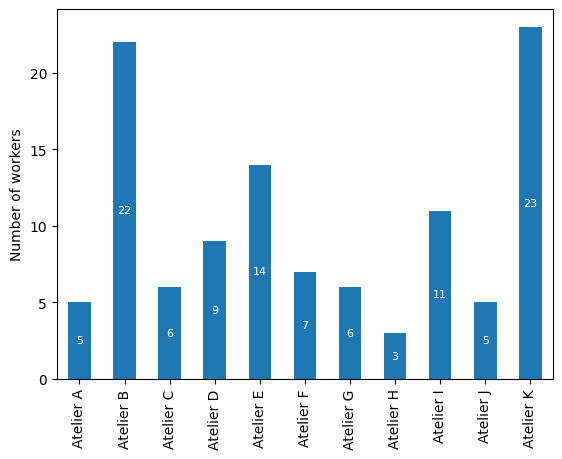

In [179]:
workshops = work_days.drop_duplicates(subset=['Name']).groupby('Atelier').size().astype(int)
ax = workshops.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=8, color='white')
plt.xlabel('')
plt.ylabel('Number of workers')

Status,Working,Training,Part time,Sick,Off
Date,,,,,
2024-01-02,75,2,1,10,122
2024-01-03,91,2,3,12,102
2024-01-04,105,2,1,14,88
2024-01-05,90,2,7,12,99
2024-01-08,159,8,5,10,28
...,...,...,...,...,...
2024-12-18,142,2,2,22,38
2024-12-19,144,7,3,22,30
2024-12-20,122,5,8,22,49


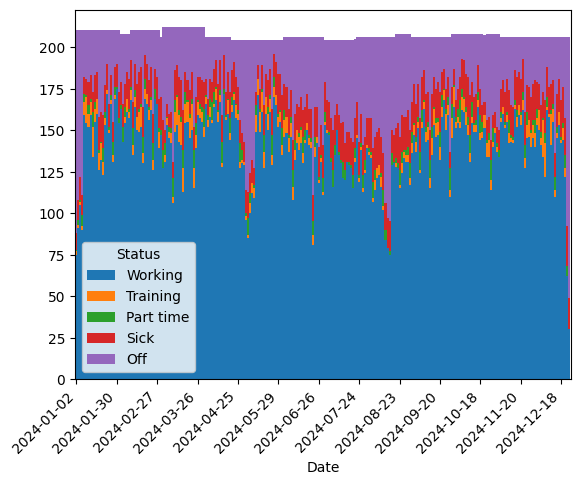

In [180]:
daily_status = work_days.groupby(['Date', 'Status']).size().unstack(fill_value=0)
daily_status = reorder_statuses(daily_status)
display_daily_status(daily_status)
daily_status

Text(0, 0.5, 'Percent of workers (%)')

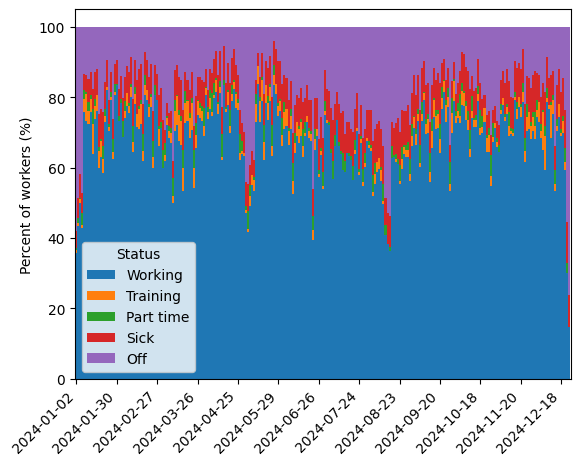

In [ ]:
normalized_daily_status = normalize_rows(daily_status)
display_daily_status(normalized_daily_status)
plt.ylabel('Percent of workers (%)')
normalized_daily_status

Text(0, 0.5, 'Percent of people taking the day off')

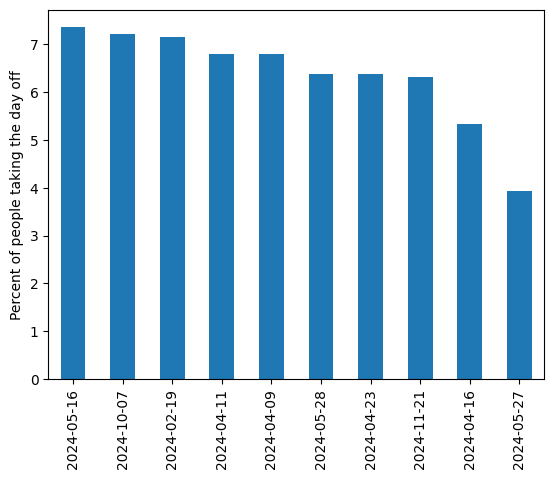

In [ ]:
# top_off = normalized_category_counts['Off'].sort_values(ascending=False).head(10)
# top_off.plot(kind='bar')
# plt.xlabel('')
# plt.ylabel('Percent of people taking the day off')

top_off = normalized_daily_status['Off'].sort_values(ascending=False).tail(10)
top_off.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Percent of people taking the day off')

Text(0, 0.5, 'Percent of people being sick')

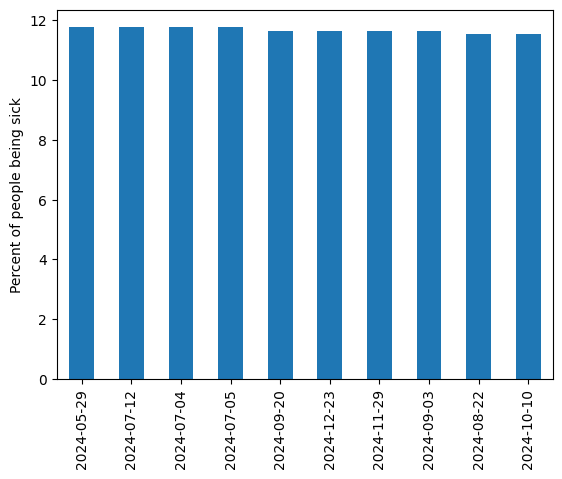

In [183]:
top_sick = normalized_daily_status['Sick'].sort_values(ascending=False).head(10)
top_sick.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Percent of people being sick')

In [184]:
days_off = work_days[ work_days['Category'] == 'Working' ]
work_days['DaysToHoliday'].hist(bins=32)
days_off['DaysToHoliday'].hist(bins=32)

KeyError: 'Category'

Category,Off,Part time,Sick,Training
DayOfWeek,,,,
1,0.184256,0.029493,0.073579,0.023430
2,0.180526,0.002230,0.077766,0.026758
3,0.203940,0.011394,0.080533,0.027424
4,0.171299,0.013207,0.084171,0.027696
5,0.250667,0.047135,0.084822,0.025056


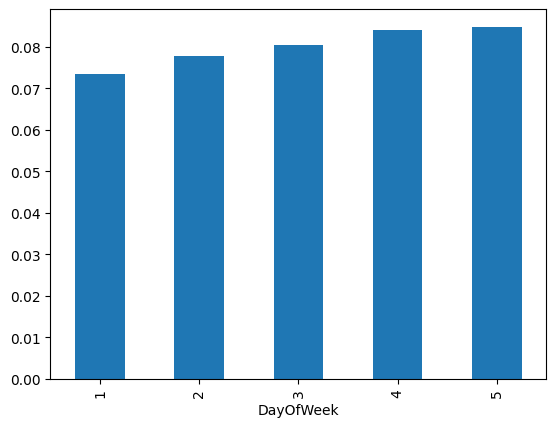

In [ ]:
day_counts = work_days.groupby(['DayOfWeek', 'Category']).size().unstack(fill_value=0)
normalized_day_counts = day_counts.div(day_counts.sum(axis=1), axis=0)
normalized_day_counts.drop(columns=['Working'], inplace=True)
normalized_day_counts['Sick'].plot(kind='bar', stacked=True)
normalized_day_counts

## Display holidays

<Axes: xlabel='Date'>

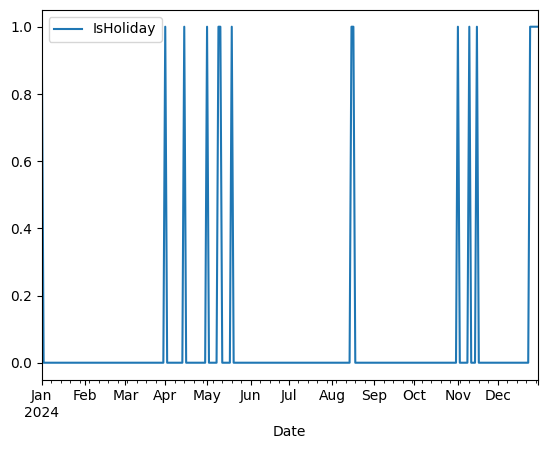

In [ ]:
dimdate[dimdate['IsWeekend'] == 0].plot(x='Date', y='IsHoliday')

## Display number of days to holidays

<Axes: >

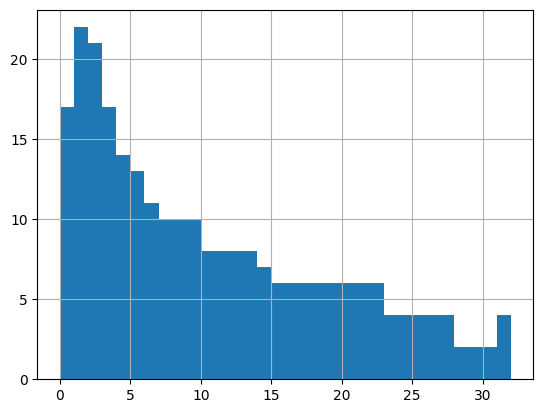

In [ ]:
dimdate.loc[dimdate['IsWeekend'] == 0, 'DaysToHoliday'].hist(bins=32)

<Axes: xlabel='Date'>

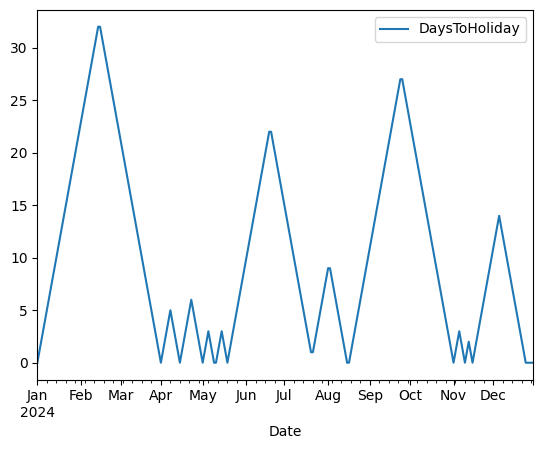

In [ ]:
no_weekend = dimdate[ (dimdate['IsWeekend'] == 0) ]
no_weekend.plot(x='Date', y='DaysToHoliday')

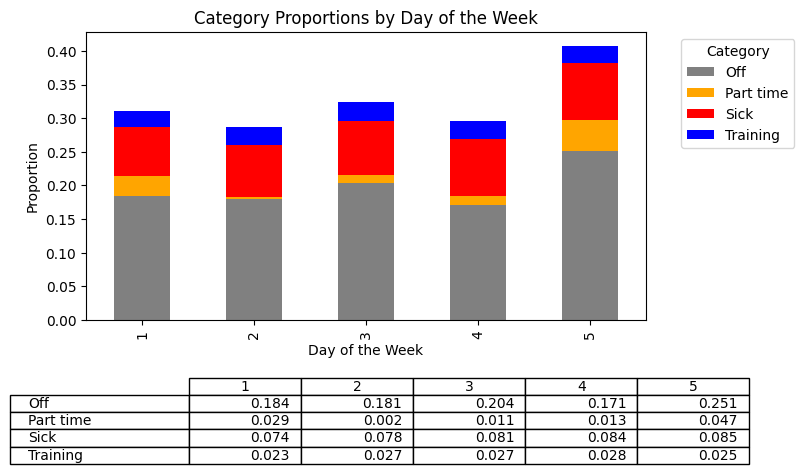

In [108]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart
normalized_day_counts.plot(kind='bar', stacked=True, ax=ax, color=['grey', 'orange', 'red', 'blue'])

# Customize the chart
ax.set_title('Category Proportions by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Proportion')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a table
table_data = normalized_day_counts.T.round(3).values  # Transpose and round the data
table_columns = normalized_day_counts.index          # Get day labels
table_rows = normalized_day_counts.columns           # Get category labels
table = plt.table(cellText=table_data, rowLabels=table_rows, colLabels=table_columns, 
                  loc='bottom', bbox=[0, -0.5, 1, 0.3])  # Position the table

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_columns))))

# Adjust layout to fit everything
plt.subplots_adjust(left=0.2, bottom=0.4)

# Show plot
plt.show()